<a href="https://colab.research.google.com/github/Chamara-g/pre-datastorm-v1-0/blob/master/pre_data_storm_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

In [132]:
#read train data set
df = pd.read_csv("drive/My Drive/FYP/dataset/credit_card_data_pre.csv", index_col=0)
df.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,DUE_AMT_GRD,PAID_AMT_GRD,PAY_GRD,PAY_DUE_GRD,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A2,1000000.0,1,2,1,2,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,162772,-13982,3437,6004,39418,162772,0,538165,12154.657143,79399.485714,-6,45777.071429,0
A3,1000000.0,0,1,1,3,0,-1,-1,-1,-1,0,353351,151818,26948,43530,80811,124590,151818,46200,43530,80811,942,33666,-38292.685714,-19692.942857,-4,-28992.814286,0
A4,100000.0,0,1,0,2,4,3,2,2,-2,-2,16681,16082,15477,0,0,0,0,0,0,0,0,0,-4203.657143,-0.000000,7,-2101.828571,1
A5,200000.0,0,2,0,2,2,0,0,0,0,0,90457,92848,95193,97309,100353,102740,3855,3890,3696,4620,4049,3918,2458.457143,49.028571,2,1253.742857,1
A6,1000000.0,0,2,1,2,2,2,0,0,0,0,429556,419466,429785,435354,445271,453899,0,20790,16170,17325,16401,17325,5848.542857,2131.800000,4,3990.171429,0


In [133]:
#read test data set
df_test = pd.read_csv("drive/My Drive/FYP/dataset/credit_card_data_test_pre.csv", index_col=0)
df_test.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,DUE_AMT_GRD,PAID_AMT_GRD,PAY_GRD,PAY_DUE_GRD
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
A20170,500000.0,1,0,0,2,0,0,0,0,0,0,194188,198510,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991,40937.571429,-3792.285714,0,18572.642857
A16887,200000.0,0,0,0,2,0,0,0,0,0,0,87115,89427,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620,2615.428571,210.971429,0,1413.200000
A3430,400000.0,1,0,1,3,-1,-1,2,0,0,-1,2693,9573,8984,11294,9561,993,6930,0,2310,0,2310,40060,-177.885714,4864.857143,-1,2343.485714
A3696,1500000.0,1,2,0,2,1,-1,-1,-2,-2,-2,0,5775,5775,0,0,0,5775,5775,0,0,0,0,-660.000000,-1320.000000,-7,-990.000000
A20474,100000.0,0,1,1,3,0,0,-2,-2,-2,-2,85257,0,0,0,0,0,0,0,0,0,0,0,-12179.571429,-0.000000,-8,-6089.785714


In [83]:
#test data set pre processing

#convet to string balance limit to float
df_test.Balance_Limit_V1 = (df_test.Balance_Limit_V1.replace(r'[KMB]+$', '', regex=True).astype(float) * df_test.Balance_Limit_V1.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))
df_test.head()

#gender education marital age stringto int convert
df_test.Gender.replace(['M', 'F'], [1, 0], inplace=True)
df_test.EDUCATION_STATUS.replace(['Graduate', 'High School', 'Other'], [2, 1, 0], inplace=True)
df_test.MARITAL_STATUS.replace(['Other', 'Single'], [1, 0], inplace=True)
df_test.AGE.replace(['Less than 30', '31-45', '46-65','More than 65'], [3, 2, 1, 0], inplace=True)

df_test.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
Client_ID,,,,,,,,,,,,,,,,,,,,,,,
A20170,500000.0,1,0,0,2,0,0,0,0,0,0,194188,198510,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991
A16887,200000.0,0,0,0,2,0,0,0,0,0,0,87115,89427,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620
A3430,400000.0,1,0,1,3,-1,-1,2,0,0,-1,2693,9573,8984,11294,9561,993,6930,0,2310,0,2310,40060
A3696,1500000.0,1,2,0,2,1,-1,-1,-2,-2,-2,0,5775,5775,0,0,0,5775,5775,0,0,0,0
A20474,100000.0,0,1,1,3,0,0,-2,-2,-2,-2,85257,0,0,0,0,0,0,0,0,0,0,0


In [66]:
#train data set pre processing

#convet to string balance limit to float
df.Balance_Limit_V1 = (df.Balance_Limit_V1.replace(r'[KMB]+$', '', regex=True).astype(float) * df.Balance_Limit_V1.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))
df.head()

#gender education marital age stringto int convert
df.Gender.replace(['M', 'F'], [1, 0], inplace=True)
df.EDUCATION_STATUS.replace(['Graduate', 'High School', 'Other'], [2, 1, 0], inplace=True)

#df.PAY_JULY.replace([-2, -1], [11, 13], inplace=True)
#df.PAY_AUG.replace([-2, -1], [11, 13], inplace=True)
#df.PAY_SEP.replace([-2, -1], [11, 13], inplace=True)
#df.PAY_OCT.replace([-2, -1], [11, 13], inplace=True)
#df.PAY_NOV.replace([-2, -1], [11, 13], inplace=True)
#df.PAY_DEC.replace([-2, -1], [11, 13], inplace=True)

df.MARITAL_STATUS.replace(['Other', 'Single'], [1, 0], inplace=True)
df.AGE.replace(['Less than 30', '31-45', '46-65','More than 65'], [3, 2, 1, 0], inplace=True)

df.head()

AttributeError: ignored

**Univariant Selection**

In [0]:
X = df.drop("NEXT_MONTH_DEFAULT",1)   #Feature Matrix
y = df["NEXT_MONTH_DEFAULT"]          #Target Variable

In [85]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)

fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(24,'Score'))  #print 10 best features

             Feature        Score
5           PAY_JULY  2821.720487
25           PAY_GRD  2024.339808
6            PAY_AUG  1747.509329
7            PAY_SEP  1332.272524
8            PAY_OCT  1133.864880
9            PAY_NOV  1012.782178
10           PAY_DEC   870.510529
0   Balance_Limit_V1   544.413586
17     PAID_AMT_JULY   128.185743
18      PAID_AMT_AUG    83.939549
19      PAID_AMT_SEP    80.464002
20      PAID_AMT_OCT    75.880451
21      PAID_AMT_NOV    69.788740
22      PAID_AMT_DEC    66.241699
1             Gender    41.700850
2   EDUCATION_STATUS    36.373624
26       PAY_DUE_GRD    24.918509
3     MARITAL_STATUS    18.701558
23       DUE_AMT_GRD    13.890440
24      PAID_AMT_GRD    12.602702
11      DUE_AMT_JULY     9.612801
12       DUE_AMT_AUG     5.531152
13       DUE_AMT_SEP     5.202269
14       DUE_AMT_OCT     2.283794


**Feature Importance**

[0.04271287 0.01376289 0.02583955 0.01469941 0.03112026 0.08144131
 0.04506212 0.02857166 0.02878326 0.02741428 0.02587316 0.04202573
 0.03985105 0.0389067  0.03934205 0.03772155 0.03788532 0.03752179
 0.03754512 0.03740651 0.03649555 0.0375747  0.03920878 0.04202784
 0.04049264 0.04863741 0.04207649]


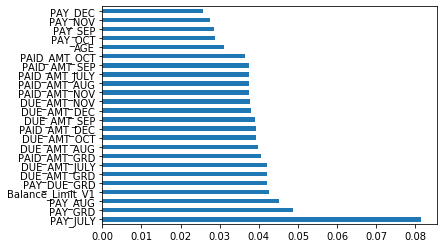

In [86]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.show()

**Recursive Feature Elimination**

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 10)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

In [88]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=15, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

Fitting estimator with 27 features.
Fitting estimator with 17 features.
15 selected features
['Balance_Limit_V1', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT', 'DUE_AMT_NOV', 'PAID_AMT_JULY', 'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC', 'DUE_AMT_GRD', 'PAID_AMT_GRD', 'PAY_DUE_GRD']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [89]:
selectedFeatures = featureScores.nlargest(27,'Score')
df_24F = df[selectedFeatures['Feature'].values]
# df_24F['NEXT_MONTH_DEFAULT'] = y
df_24F.head()

,PAY_JULY,PAY_GRD,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,Balance_Limit_V1,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,Gender,EDUCATION_STATUS,PAY_DUE_GRD,MARITAL_STATUS,DUE_AMT_GRD,PAID_AMT_GRD,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,AGE
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
A2,-1,-6,-1,-1,-1,-1,-1,1000000.0,3437,6004,39418,162772,0,538165,1,2,45777.071429,1,12154.657143,79399.485714,3248,3389,6004,39418,162772,-13982,2
A3,0,-4,-1,-1,-1,-1,0,1000000.0,151818,46200,43530,80811,942,33666,0,1,-28992.814286,1,-38292.685714,-19692.942857,353351,151818,26948,43530,80811,124590,3
A4,4,7,3,2,2,-2,-2,100000.0,0,0,0,0,0,0,0,1,-2101.828571,0,-4203.657143,-0.000000,16681,16082,15477,0,0,0,2
A5,2,2,0,0,0,0,0,200000.0,3855,3890,3696,4620,4049,3918,0,2,1253.742857,0,2458.457143,49.028571,90457,92848,95193,97309,100353,102740,2
A6,2,4,2,0,0,0,0,1000000.0,0,20790,16170,17325,16401,17325,0,2,3990.171429,1,5848.542857,2131.800000,429556,419466,429785,435354,445271,453899,2


In [0]:
def randomForest(dataFrame, target):

  #Create a svm Classifier
  clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  scores = cross_val_score(clf, dataFrame, target, cv=3)

  return scores.mean()

def returnScoreDataFrameModels(dataFrame):
  lists1 = []
  lists2 = []
  lists3 = []

  for i in [28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16 , 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]:

    # lists1.append(svmLinear(dataFrame.iloc[:,0:(i)], y))
    # lists2.append(svmGaussian(dataFrame.iloc[:,0:(i)], y))
    lists3.append(randomForest(dataFrame.iloc[:,0:(i)], y))

  rows = ["randomForest"]

  data = np.array([lists3])
  randomForestScore = pd.DataFrame(data=data, index=rows).transpose()

  return randomForestScore

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

import matplotlib.pyplot as plt

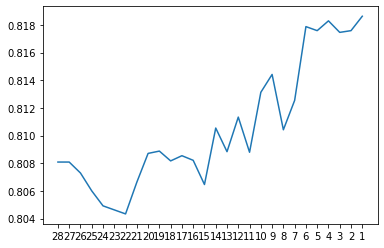

In [92]:
randomForestScore = returnScoreDataFrameModels(df_24F)

pcaScore = ["28", "27", "26", "25", "24", "23", "22", "21", "20", "19", "18", "17", "16" , "15", "14", "13", "12", "11", "10", "9", "8", "7", "6", "5", "4", "3", "2", "1"] 

plt.plot(pcaScore, randomForestScore["randomForest"], label='linear')


In [93]:
randomForestScore

,randomForest
0,0.808083
1,0.808083
2,0.807292
3,0.806000
4,0.804917
5,0.804625
6,0.804333
7,0.806625
8,0.808708
9,0.808875


In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

from sklearn import metrics

from nltk.classify.scikitlearn import SklearnClassifier 
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.model_selection import train_test_split 

from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [0]:
def printClassificationResults(X_train, X_test, y_train, y_test):    
  
  # gnb_clf = GaussianNB() 
  # score_gnb = cross_val_score(gnb_clf, X_train, y_train, cv=3)
  # gnb_clf.fit(X_train, y_train) 

  dt_clf = DecisionTreeClassifier(random_state=41,max_leaf_nodes=3)
  score_dt = cross_val_score(dt_clf, X_train, y_train, cv=3)
  dt_clf.fit(X_train, y_train) 

  # knn_clf = KNeighborsClassifier(n_neighbors=2)
  # score_knn = cross_val_score(knn_clf, X_train, y_train, cv=3)
  # knn_clf.fit(X_train, y_train)

  #svm_li_clf = svm.SVC(kernel='linear') # Linear Kernel
  #score_svm_li = cross_val_score(svm_li_clf, X_train, y_train, cv=3)
  #svm_li_clf.fit(X_train, y_train)

  # svm_rbf_clf = SVC(kernel="rbf", gamma="auto", C=1)
  # score_svm_rbf = cross_val_score(svm_rbf_clf, X_train, y_train, cv=3)
  # svm_rbf_clf.fit(X_train, y_train)

  RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  score_RF = cross_val_score(RF_clf, X_train, y_train, cv=3)
  RF_clf.fit(X_train, y_train)
  
  GB_clf = GradientBoostingClassifier(random_state=41,n_estimators=10,max_depth=4)
  score_GB = cross_val_score(GB_clf, X_train, y_train, cv=3)
  GB_clf.fit(X_train, y_train)

  AB_clf = AdaBoostClassifier(random_state=42,n_estimators=17)
  score_AB = cross_val_score(AB_clf, X_train, y_train, cv=3)
  AB_clf.fit(X_train, y_train)

  # making predictions on the testing set 
  # y_pred_gnb = gnb_clf.predict(X_test) 
  y_pred_dt = dt_clf.predict(X_test) 
  # y_pred_knn = knn_clf.predict(X_test)
  #y_pred_svm_li = svm_li_clf.predict(X_test)
  # y_pred_svm_rbf = svm_rbf_clf.predict(X_test)
  y_pred_RF = RF_clf.predict(X_test)
  y_pred_GB = GB_clf.predict(X_test)
  y_pred_AB = AB_clf.predict(X_test)
    
  # comparing actual response values (y_test) with predicted response values (y_pred) 
  print("\t\t\t\t\t\t\t Testing\t Training")
  # print("Gaussian Naive Bayes model accuracy(in %) \t:", round(metrics.accuracy_score(np.int64(y_test.values), y_pred_gnb)*100,2) ,"\t", round(score_gnb.mean()*100,2))
  print("Decision Tree model accuracy(in %) \t\t\t:", round(metrics.accuracy_score(np.int64(y_test.values), y_pred_dt)*100,4) ,"\t", round(score_dt.mean()*100,2))
  # print("Nearest Neighbors model accuracy(in %) \t\t:", round(metrics.accuracy_score(np.int64(y_test.values), y_pred_knn)*100,2) ,"\t", round(score_knn.mean()*100,2))
  # print("SVM + Gaussian kernel model accuracy(in %) \t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_svm_rbf)*100,2) ,"\t", round(score_svm_rbf.mean()*100,2))
  #print("SVM + linear kerne model accuracy(in %) \t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_svm_li)*100,2) ,"\t", round(score_svm_li.mean()*100,2))
  print("Random forest model accuracy(in %) \t \t\t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_RF)*100,4) ,"\t", round(score_RF.mean()*100,2))
  print("Gradient Boosting Classifier accuracy(in %) \t \t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_GB)*100,4) ,"\t", round(score_GB.mean()*100,2))
  print("Ada Boost Classifier accuracy(in %) \t \t\t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_AB)*100,4) ,"\t", round(score_AB.mean()*100,2))

In [112]:
import copy
def combinations(target,data):
     for i in range(len(data)):
         new_target = copy.copy(target)
         new_data = copy.copy(data)
         new_target.append(data[i])
         new_data = data[i+1:]
         print(new_target)
         X_selected = X[new_target]
         X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=1) 
         printClassificationResults(X_train, X_test, y_train, y_test)
         combinations(new_target, new_data)

target = []
data = ["PAY_JULY",	"PAY_AUG",	"PAY_SEP",	"PAY_OCT",	"PAY_NOV",	"PAY_DEC",	"DUE_AMT_JULY",	"DUE_AMT_AUG",	"DUE_AMT_SEP",	"DUE_AMT_OCT",	"DUE_AMT_NOV",	"DUE_AMT_DEC",	"PAID_AMT_JULY",	"PAID_AMT_AUG",	"PAID_AMT_SEP",	"PAID_AMT_OCT",	"PAID_AMT_NOV",	"PAID_AMT_DEC",	"DUE_AMT_GRD",	"PAID_AMT_GRD",	"PAY_GRD",	"PAY_DUE_GRD","Balance_Limit_V1",	"Gender",	"EDUCATION_STATUS",	"MARITAL_STATUS",	"AGE"]
combinations(target,data)


Streaming output truncated to the last 5000 lines.
['PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC', 'DUE_AMT_GRD', 'PAY_DUE_GRD', 'MARITAL_STATUS', 'AGE']
							 Testing	 Training
Decision Tree model accuracy(in %) 			: 82.1528 	 81.74
Random forest model accuracy(in %) 	 		: 80.3194 	 80.01
Gradient Boosting Classifier accuracy(in %) 	 	: 81.3889 	 81.47
Ada Boost Classifier accuracy(in %) 	 		: 81.7083 	 81.38
['PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC', 'DUE_AMT_GRD', 'PAY_DUE_GRD', 'AGE']
							 Testing	 Training
Decision Tree model accuracy(in %) 			: 82.1528 	 81.74
R

KeyboardInterrupt: ignored

In [135]:
#selected_col_names = ["PAY_JULY"]
#selected_col_names = ["PAY_JULY",	"PAY_AUG",	"PAY_SEP",	"PAY_GRD"]
#selected_col_names = ["PAY_JULY",	"PAY_GRD",	"DUE_AMT_GRD",	"DUE_AMT_JULY",	"PAY_AUG",	"PAID_AMT_GRD", "Balance_Limit_V1"]
#selected_col_names = ["PAY_JULY",	"PAY_AUG",	"PAY_SEP",	"PAY_OCT",	"PAY_NOV",	"PAY_DEC"]
#selected_col_names = ["PAY_JULY" ,"Balance_Limit_V1" ,"PAY_AUG" ,"DUE_AMT_JULY" ,"DUE_AMT_AUG" ,"DUE_AMT_SEP" ,"PAID_AMT_JULY" ,"DUE_AMT_OCT" ,"AGE" ,"DUE_AMT_DEC"]
selected_col_names = ["PAY_JULY", "DUE_AMT_JULY", "PAID_AMT_JULY", 'PAY_GRD', "Balance_Limit_V1", "DUE_AMT_GRD", "PAY_AUG",	"PAY_SEP",	"PAY_OCT",	"PAY_NOV",	"PAY_DEC"]
X_selected = X[selected_col_names]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=1) 
printClassificationResults(X_train, X_test, y_train, y_test)

							 Testing	 Training
Decision Tree model accuracy(in %) 			: 82.1528 	 81.74
Random forest model accuracy(in %) 	 		: 81.2917 	 81.03
Gradient Boosting Classifier accuracy(in %) 	 	: 81.2917 	 81.25
Ada Boost Classifier accuracy(in %) 	 		: 81.3889 	 81.36


In [0]:
X_train = X_selected
y_train = y

In [0]:
RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
score_RF = cross_val_score(RF_clf, X_train, y_train, cv=3)
RF_clf.fit(X_train, y_train)

In [0]:
X_test = df_test[selected_col_names]
y_pred_RF = RF_clf.predict(X_test)
df_test["NEXT_MONTH_DEFAULT"] = y_pred_RF
df_test.head()

**Dissition Tree**

In [137]:
  dt_clf = DecisionTreeClassifier(random_state=41,max_leaf_nodes=3)
  score_dt = cross_val_score(dt_clf, X_train, y_train, cv=3)
  dt_clf.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=41, splitter='best')

In [139]:
X_test = df_test[selected_col_names]
y_pred_DT = dt_clf.predict(X_test)
df_test["NEXT_MONTH_DEFAULT"] = y_pred_DT
df_test.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,DUE_AMT_GRD,PAID_AMT_GRD,PAY_GRD,PAY_DUE_GRD,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A20170,500000.0,1,0,0,2,0,0,0,0,0,0,194188,198510,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991,40937.571429,-3792.285714,0,18572.642857,0
A16887,200000.0,0,0,0,2,0,0,0,0,0,0,87115,89427,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620,2615.428571,210.971429,0,1413.200000,0
A3430,400000.0,1,0,1,3,-1,-1,2,0,0,-1,2693,9573,8984,11294,9561,993,6930,0,2310,0,2310,40060,-177.885714,4864.857143,-1,2343.485714,0
A3696,1500000.0,1,2,0,2,1,-1,-1,-2,-2,-2,0,5775,5775,0,0,0,5775,5775,0,0,0,0,-660.000000,-1320.000000,-7,-990.000000,0
A20474,100000.0,0,1,1,3,0,0,-2,-2,-2,-2,85257,0,0,0,0,0,0,0,0,0,0,0,-12179.571429,-0.000000,-8,-6089.785714,0


**Ada Boost Classification**

In [0]:
  AB_clf = AdaBoostClassifier(random_state=42,n_estimators=17)
  score_AB = cross_val_score(AB_clf, X_train, y_train, cv=3)
  AB_clf.fit(X_train, y_train)
  (score_AB.mean())*100

In [0]:
X_test = df_test[selected_col_names]
y_pred_AB = AB_clf.predict(X_test)
df_test["NEXT_MONTH_DEFAULT"] = y_pred_AB
df_test.head()

**Gradeint Boosting**

In [0]:
  GB_clf = GradientBoostingClassifier(random_state=41,n_estimators=10,max_depth=4)
  score_GB = cross_val_score(GB_clf, X_train, y_train, cv=3)
  GB_clf.fit(X_train, y_train)
  (score_GB.mean())*100

In [0]:
X_test = df_test[selected_col_names]
y_pred_GB = GB_clf.predict(X_test)
df_test["NEXT_MONTH_DEFAULT"] = y_pred_GB
df_test.head()

In [0]:
df_out = df_test['NEXT_MONTH_DEFAULT']
df_out.to_csv('drive/My Drive/FYP/dataset/credit_card_output_dt.csv', encoding='utf-8', mode='w', header=["NEXT_MONTH_DEFAULT"], index=True)